In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
import matplotlib.pyplot as plt

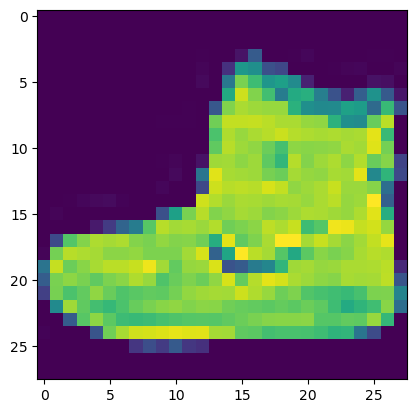

In [6]:
plt.imshow(x_train[0])

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
#resize and normalize
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')/255

In [13]:
from keras.utils import to_categorical # convert to one-hot vector
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Conv2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size = 10, epochs =10,verbose=1)

Epoch 1/10
6000/6000 [==============================] - 274s 45ms/step - loss: 1.0874 - accuracy: 0.5888 - val_loss: 0.8267 - val_accuracy: 0.6884
Epoch 2/10
6000/6000 [==============================] - 269s 45ms/step - loss: 0.7480 - accuracy: 0.7221 - val_loss: 0.7850 - val_accuracy: 0.7179
Epoch 3/10
6000/6000 [==============================] - 164s 27ms/step - loss: 0.7033 - accuracy: 0.7389 - val_loss: 0.7077 - val_accuracy: 0.7392
Epoch 4/10
6000/6000 [==============================] - 98s 16ms/step - loss: 0.6801 - accuracy: 0.7469 - val_loss: 0.7353 - val_accuracy: 0.7160
Epoch 5/10
6000/6000 [==============================] - 97s 16ms/step - loss: 0.6600 - accuracy: 0.7520 - val_loss: 0.6818 - val_accuracy: 0.7467
Epoch 6/10
6000/6000 [==============================] - 103s 17ms/step - loss: 0.6434 - accuracy: 0.7589 - val_loss: 0.6794 - val_accuracy: 0.7459
Epoch 7/10
6000/6000 [==============================] - 98s 16ms/step - loss: 0.6311 - accuracy: 0.7638 - val_loss: 0.65

In [20]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.6146194934844971, 0.7684999704360962]


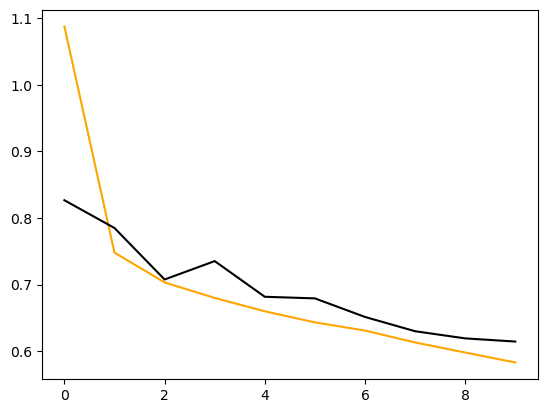

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='black')

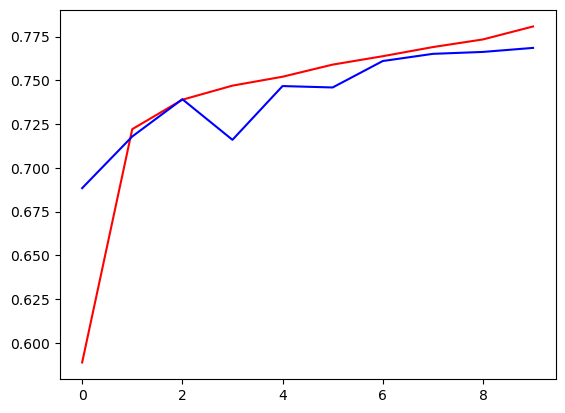

In [23]:
plt.plot(history.history['accuracy'] ,color='r')
plt.plot(history.history['val_accuracy'],color='blue')

In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 500)               2704500   
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 2,709,830
Trainable params: 2,709,830
Non-trainable params: 0
____________________________________________

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history=model.fit(x_train, y_train, batch_size = 10,validation_data=(x_test,y_test),epochs =10,verbose=1)

Epoch 1/10
6000/6000 [==============================] - 742s 123ms/step - loss: 0.7097 - accuracy: 0.7396 - val_loss: 0.5556 - val_accuracy: 0.7917
Epoch 2/10
6000/6000 [==============================] - 733s 122ms/step - loss: 0.4702 - accuracy: 0.8300 - val_loss: 0.4612 - val_accuracy: 0.8324
Epoch 3/10
6000/6000 [==============================] - 722s 120ms/step - loss: 0.4116 - accuracy: 0.8514 - val_loss: 0.4346 - val_accuracy: 0.8446
Epoch 4/10
6000/6000 [==============================] - 638s 106ms/step - loss: 0.3806 - accuracy: 0.8613 - val_loss: 0.3926 - val_accuracy: 0.8565
Epoch 5/10
6000/6000 [==============================] - 617s 103ms/step - loss: 0.3588 - accuracy: 0.8682 - val_loss: 0.4002 - val_accuracy: 0.8575
Epoch 6/10
6000/6000 [==============================] - 545s 91ms/step - loss: 0.3418 - accuracy: 0.8748 - val_loss: 0.3693 - val_accuracy: 0.8648
Epoch 7/10
6000/6000 [==============================] - 714s 119ms/step - loss: 0.3258 - accuracy: 0.8798 - val_l

In [28]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.3356347382068634, 0.8763999938964844]


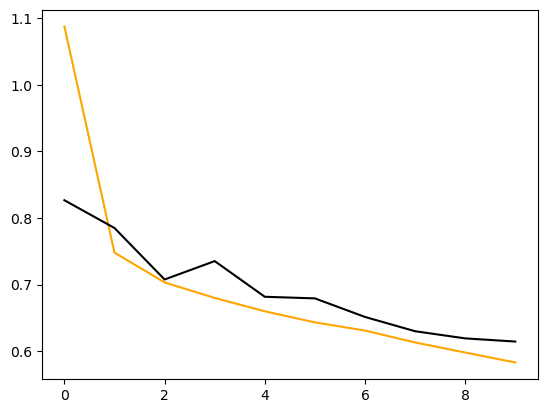

In [29]:
plt.plot(history.history['loss'],color='orange')
plt.plot(history.history['val_loss'],color='black')

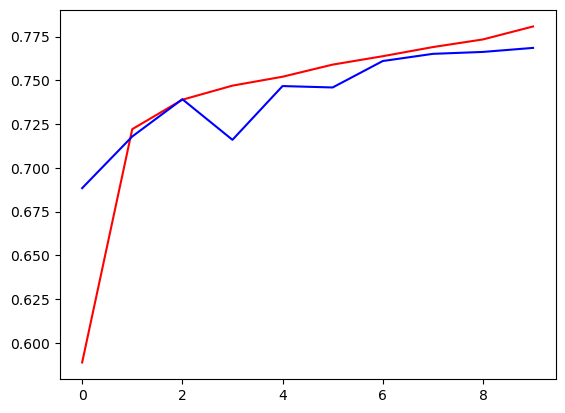

In [30]:
plt.plot(history.history['accuracy'] ,color='r')
plt.plot(history.history['val_accuracy'],color='blue')

# Confusion Matrix

In [31]:
import numpy as np

In [32]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
cm=confusion_matrix(y_test,y_pred)
print(cm)

313/313 [==============================] - 9s 25ms/step
[[856   0  14  41   7   1  71   0  10   0]
 [  1 968   0  19   8   0   4   0   0   0]
 [ 17   1 752  10 150   0  69   0   1   0]
 [ 16   4  15 894  49   0  18   0   4   0]
 [  0   1  53  27 872   1  45   0   1   0]
 [  0   0   0   1   0 947   0  34   1  17]
 [190   1  72  31 113   1 576   0  16   0]
 [  0   0   0   0   0   9   0 961   0  30]
 [  1   0   1   4   5   2   2   5 980   0]
 [  1   0   0   0   0   5   0  36   0 958]]


<AxesSubplot:>

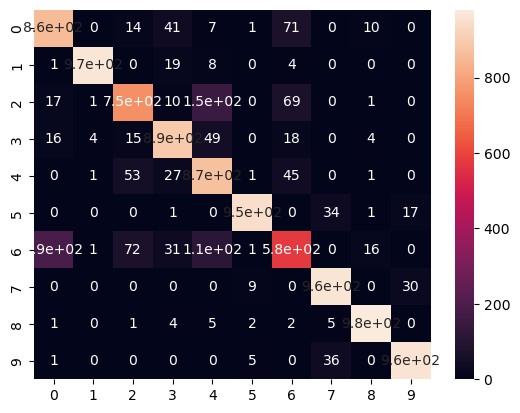

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [34]:
from sklearn.metrics import accuracy_score #accuracy_score
accuracy_score(y_test,y_pred)

0.8764

# Classification Report

In [35]:
from sklearn.metrics import classification_report
cr=classification_report
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.75      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.72      0.87      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.73      0.58      0.65      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

